IMPORTANTE: para utilizar cualquiera de los EDA, hay que poner la API-KEY de Binance de cada uno! (Por obvias cuestiones de seguridad, yo subo los EDA sin las key)

In [2]:
!pip install python-binance

from binance.client import Client


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Importación de librerías necesarias:

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns

**Análisis Exploratorio de Datos**

En base a la documentación de Binance, consumo la api y pruebo si me trae el valor actual de BTC

In [6]:
api_key = 'completar con api key de binance'
api_secret = 'completar con api secret de binance'

client = Client(api_key, api_secret)

ticker = client.get_ticker(symbol='BTCUSDT')

print(f"precio actual BTC: {ticker['lastPrice']}")


precio actual BTC: 29249.85000000


In [24]:
#Los datos de las columnas los saque de la documentación
columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore']
interval = Client.KLINE_INTERVAL_1DAY #el intervalo de las velas va a ser de 1 día.
klines = client.get_klines(symbol='BTCUSDT', interval=interval)

#Creo un dataframe para explorar btc:
df = pd.DataFrame(klines, columns=columns)
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

In [15]:
df.head()

,timestamp,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,2022-04-03,45810.99000000,47444.11000000,45530.92000000,46407.35000000,33394.67794000,1649030399999,1550999693.05080480,966563,16740.18067000,777615974.81551770,0
1,2022-04-04,46407.36000000,46890.71000000,45118.00000000,46580.51000000,44641.87514000,1649116799999,2053434523.86853890,1171998,21913.04154000,1008164276.04901840,0
2,2022-04-05,46580.50000000,47200.00000000,45353.81000000,45497.55000000,42192.74852000,1649203199999,1951668192.92950980,1046080,20607.57735000,953494654.45992840,0
3,2022-04-06,45497.54000000,45507.14000000,43121.00000000,43170.47000000,60849.32936000,1649289599999,2700644700.89039180,1471912,29467.28381000,1307725131.19462540,0
4,2022-04-07,43170.47000000,43900.99000000,42727.35000000,43444.19000000,37396.54156000,1649375999999,1623879486.66003130,999816,18567.25999000,806358703.21566620,0


In [16]:
print(df.describe())

                 timestamp    close_time  number_of_trades
count                  500  5.000000e+02      5.000000e+02
mean   2022-12-08 12:00:00  1.670587e+12      3.754316e+06
min    2022-04-03 00:00:00  1.649030e+12      3.108520e+05
25%    2022-08-05 18:00:00  1.659809e+12      1.015768e+06
50%    2022-12-08 12:00:00  1.670587e+12      3.246832e+06
75%    2023-04-12 06:00:00  1.681366e+12      5.837862e+06
max    2023-08-15 00:00:00  1.692144e+12      1.522359e+07
std                    NaN  1.248323e+10      3.118662e+06


In [17]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   timestamp                     500 non-null    datetime64[ns]
 1   open                          500 non-null    object        
 2   high                          500 non-null    object        
 3   low                           500 non-null    object        
 4   close                         500 non-null    object        
 5   volume                        500 non-null    object        
 6   close_time                    500 non-null    int64         
 7   quote_asset_volume            500 non-null    object        
 8   number_of_trades              500 non-null    int64         
 9   taker_buy_base_asset_volume   500 non-null    object        
 10  taker_buy_quote_asset_volume  500 non-null    object        
 11  ignore                        50

In [19]:
df.isnull().sum() #esto no tiene mucho sentido en este tipo de datos, son registros completos y al ser sacados de la API oficial de binance, 
#algunos de los chequeos que se hacen generalmente en df convencionales quedan obsoletos en este tipo de información donde suele ya haber un trabajo 
#de estructura y selección(para levantar los graficos en BINANCE y los clientes puedan e interactuar con las criptomonedas minuto a minuto)

timestamp                       0
open                            0
high                            0
low                             0
close                           0
volume                          0
close_time                      0
quote_asset_volume              0
number_of_trades                0
taker_buy_base_asset_volume     0
taker_buy_quote_asset_volume    0
ignore                          0
dtype: int64

Variables que me parecen interesantespero que aun no exporte:
symbol: el simbolo de la criptomoneda
price: precio.
market_cap: la capitalizacion.

In [7]:
symbol = 'BTCUSDT'
limit = 100  #cantidad de puntos de data

#traigo data de btc del año 2019
candles = client.get_historical_klines(symbol=symbol, interval=Client.KLINE_INTERVAL_1DAY, start_str='2019-01-01', end_str='2019-12-31')
df = pd.DataFrame(candles, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore'])

#conversion de timestamp en date
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
df.set_index('timestamp', inplace=True)

volume_trace = go.Bar(
    x=df.index,
    y=df['volume'].astype(float),
    marker=dict(color='blue'),
    name='Volumen'
)

candlestick_trace = go.Candlestick(
       x=df.index,
       open=df['open'].astype(float),
       high=df['high'].astype(float),
       low=df['low'].astype(float),
       close=df['close'].astype(float),
       name='Precios'
   )

fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.1, row_heights=[0.7, 0.3])
fig.add_trace(candlestick_trace, row=1, col=1)
fig.add_trace(volume_trace, row=2, col=1)
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

Cuando el precio del Bitcoin sube, los traders tienden a ser estar menos activos y el volumen de negociación baja (creeria yo en base a este grafico y analisis extra en internet, que porque no les conviene la venta). 
Pero si el precio baja, los traders ven una oportunidad de venta por ende el volumen aumenta.
La subida de precios puede significar menos acción, y bajada de precios puede significar mas movimiento en criptos. 

In [36]:
df['close'] = pd.to_numeric(df['close'])
#no podía sacar la correlacion con "close" porque no todos los datos eran de tipo numerico. 
# (subestime un poco al creer que algunos chequeos quedaban "obsoletos en este tipo de información")

In [39]:
df['volume'] = pd.to_numeric(df['volume'])

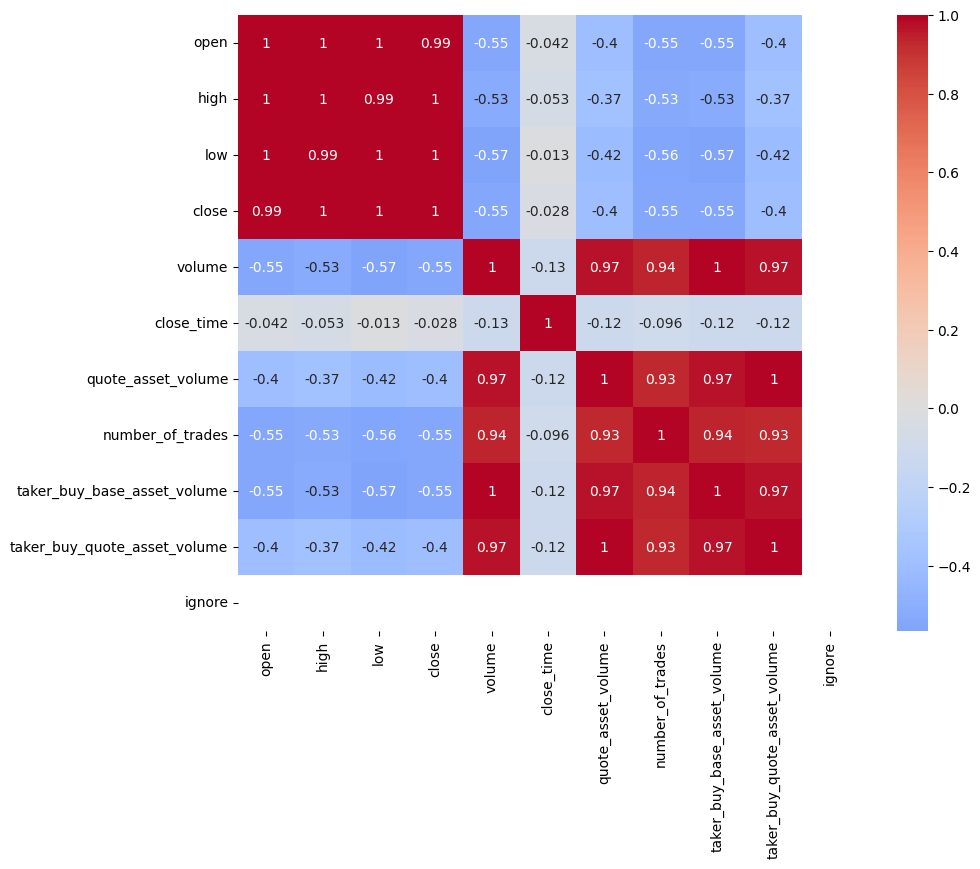

In [48]:
correlation_matrix = df.corr()

#mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.show()

Estos datos no son ideales para sacar correlación, si bien son datos cuantitativos y en el mapa de calor se ve sectores de maxima correlacion... la "correlación" es porque los datos fluctuan de apoco, siguen un camino lento de una fase a la otra.
Sucede tanto en la apertura, bajada, subida y cierre como en el volumen, numero de operaciones y traders, pero estos valores de correlación altos no significan que tengamos un patron que nos revele algo interesante entre estas variables.

In [10]:
symbols = ['BTCUSDT', 'ETHUSDT', 'XRPUSDT', 'MATICUSDT']

interval = Client.KLINE_INTERVAL_1DAY

start_date = 1356998400000

historical_data = {}

for symbol in symbols:
    klines = client.get_historical_klines(symbol, interval, start_str=start_date)
    historical_data[symbol] = klines

#dataframe para cada cripto
dataframes = {}
for symbol, klines in historical_data.items():
    columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore']
    df = pd.DataFrame(klines, columns=columns)
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    dataframes[symbol] = df

In [11]:
filter_df = dataframes['MATICUSDT']
filter_df_year = filter_df[filter_df['timestamp'].dt.year == 2019]  #filtro por año
print(filter_df_year)

     timestamp        open        high         low       close  \
0   2019-04-26  0.00990000  0.01052000  0.00481000  0.00545000   
1   2019-04-27  0.00543000  0.00586000  0.00516000  0.00521000   
2   2019-04-28  0.00521000  0.00527000  0.00434000  0.00442000   
3   2019-04-29  0.00442000  0.00456000  0.00343000  0.00347000   
4   2019-04-30  0.00346000  0.00516000  0.00346000  0.00442000   
..         ...         ...         ...         ...         ...   
245 2019-12-27  0.01563000  0.01585000  0.01451000  0.01518000   
246 2019-12-28  0.01519000  0.01546000  0.01492000  0.01494000   
247 2019-12-29  0.01494000  0.01539000  0.01455000  0.01474000   
248 2019-12-30  0.01473000  0.01496000  0.01420000  0.01427000   
249 2019-12-31  0.01428000  0.01451000  0.01366000  0.01379000   

                  volume     close_time quote_asset_volume  number_of_trades  \
0    2251813333.70000000  1556323199999  13165943.99965100             29783   
1     440339020.00000000  1556409599999   24011

Con la siguiente celda, guardo los archivos extraidos en un csv

In [54]:
#for symbol, df in historical_data.items():
#    df = pd.DataFrame(df)
#    df.to_csv(f'{symbol}_historical_data.csv', index=False)